In [42]:
#Load packages

from math import log2
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt



In [43]:
#load data

df = pd.read_csv('cardrivingdecision.csv')
df.head()

,Day,Temperature,Wind,Traffic Jam,Car Driving
0,1,hot,weak,long,no
1,2,hot,strong,long,no
2,3,hot,weak,long,yes
3,4,mild,weak,long,yes
4,5,cool,weak,short,yes


In [44]:
# Transform categorical data to numerical values

df['Temperature']=df['Temperature'].replace(to_replace='hot',value=3)
df['Temperature']=df['Temperature'].replace(to_replace='mild',value=2)
df['Temperature']=df['Temperature'].replace(to_replace='cool',value=1)

df['Wind']=df['Wind'].replace(to_replace='weak',value=1)
df['Wind']=df['Wind'].replace(to_replace='strong',value=2)

df['Traffic Jam']=df['Traffic Jam'].replace(to_replace='long',value=2)
df['Traffic Jam']=df['Traffic Jam'].replace(to_replace='short',value=1)

df['Car Driving']=df['Car Driving'].replace(to_replace='no',value=0)
df['Car Driving']=df['Car Driving'].replace(to_replace='yes',value=1)

df.head()

,Day,Temperature,Wind,Traffic Jam,Car Driving
0,1,3,1,2,0
1,2,3,2,2,0
2,3,3,1,2,1
3,4,2,1,2,1
4,5,1,1,1,1


In [45]:
# split into predictor and target variable datasets

X = df[['Temperature','Wind','Traffic Jam']]
y = df[['Car Driving']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  14 non-null     int64
 1   Wind         14 non-null     int64
 2   Traffic Jam  14 non-null     int64
dtypes: int64(3)
memory usage: 464.0 bytes


In [46]:
# calculate the entropy for the split in the dataset
def entropy(class0, class1):
	return -(class0 * log2(class0) + class1 * log2(class1))
 
# split of the main dataset into no and yes
class0 = 5 / 14
class1 = 9 / 14

# calculate entropy of dataset
s_entropy = entropy(class0, class1)
print('Dataset Entropy: %.3f bits' % s_entropy)
 


Dataset Entropy: 0.940 bits


In [47]:
# calculation for information Gain for Temperature x1

# Temperature hot
s1_class0 = 2 / 4
s1_class1 = 2 / 4
# calculate the entropy of the first group
s1_entropy = entropy(s1_class0, s1_class1)
print('Temperature hot Entropy: %.3f bits' % s1_entropy)
 
# Temperature mild
s2_class0 = 2 / 6
s2_class1 = 4 / 6
# calculate the entropy of the second group
s2_entropy = entropy(s2_class0, s2_class1)
print('Temperature mild Entropy: %.3f bits' % s2_entropy)

# Temperature cool
s3_class0 = 1 / 4
s3_class1 = 3 / 4
# calculate the entropy of the second group
s3_entropy = entropy(s3_class0, s3_class1)
print('Temperature cool Entropy: %.3f bits' % s3_entropy)
 
# calculate the information gain
gain = s_entropy - (4/14 * s1_entropy + 6/14 * s2_entropy + 4/14 * s3_entropy)
print('Information Gain for Temperature x1: %.3f bits' % gain)

Temperature hot Entropy: 1.000 bits
Temperature mild Entropy: 0.918 bits
Temperature cool Entropy: 0.811 bits
Information Gain for Temperature x1: 0.029 bits


In [48]:
# calculation for information Gain for Wind x2

# Wind weak
s1_class0 = 2 / 8
s1_class1 = 6 / 8
# calculate the entropy of the first group
s1_entropy = entropy(s1_class0, s1_class1)
print('Wind weak Entropy: %.3f bits' % s1_entropy)
 
# Wind strong
s2_class0 = 3 / 6
s2_class1 = 3 / 6
# calculate the entropy of the second group
s2_entropy = entropy(s2_class0, s2_class1)
print('Wind strong Entropy: %.3f bits' % s2_entropy)
 
# calculate the information gain
gain = s_entropy - (8/14 * s1_entropy + 6/14 * s2_entropy)
print('Information Gain for Wind x2: %.3f bits' % gain)

Wind weak Entropy: 0.811 bits
Wind strong Entropy: 1.000 bits
Information Gain for Wind x2: 0.048 bits


In [49]:
# calculation for information Gain for Traffic-Jam x3

# Traffic-jam long 
s1_class0 = 4 / 7
s1_class1 = 3 / 7
# calculate the entropy of the first group
s1_entropy = entropy(s1_class0, s1_class1)
print('Traffic long Entropy: %.3f bits' % s1_entropy)
 
# Traffic-jam short
s2_class0 = 1 / 7
s2_class1 = 6 / 7
# calculate the entropy of the second group
s2_entropy = entropy(s2_class0, s2_class1)
print('Traffic short Entropy: %.3f bits' % s2_entropy)
 
# calculate the information gain
gain = s_entropy - (7/14 * s1_entropy + 7/14 * s2_entropy)
print('Information Gain for Traffic-Jam x3: %.3f bits' % gain)

Traffic long Entropy: 0.985 bits
Traffic short Entropy: 0.592 bits
Information Gain for Traffic-Jam x3: 0.152 bits


In [50]:
# Run the decision tree classifier

clf = DecisionTreeClassifier()
clf.fit(X,y)

#https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd

DecisionTreeClassifier()

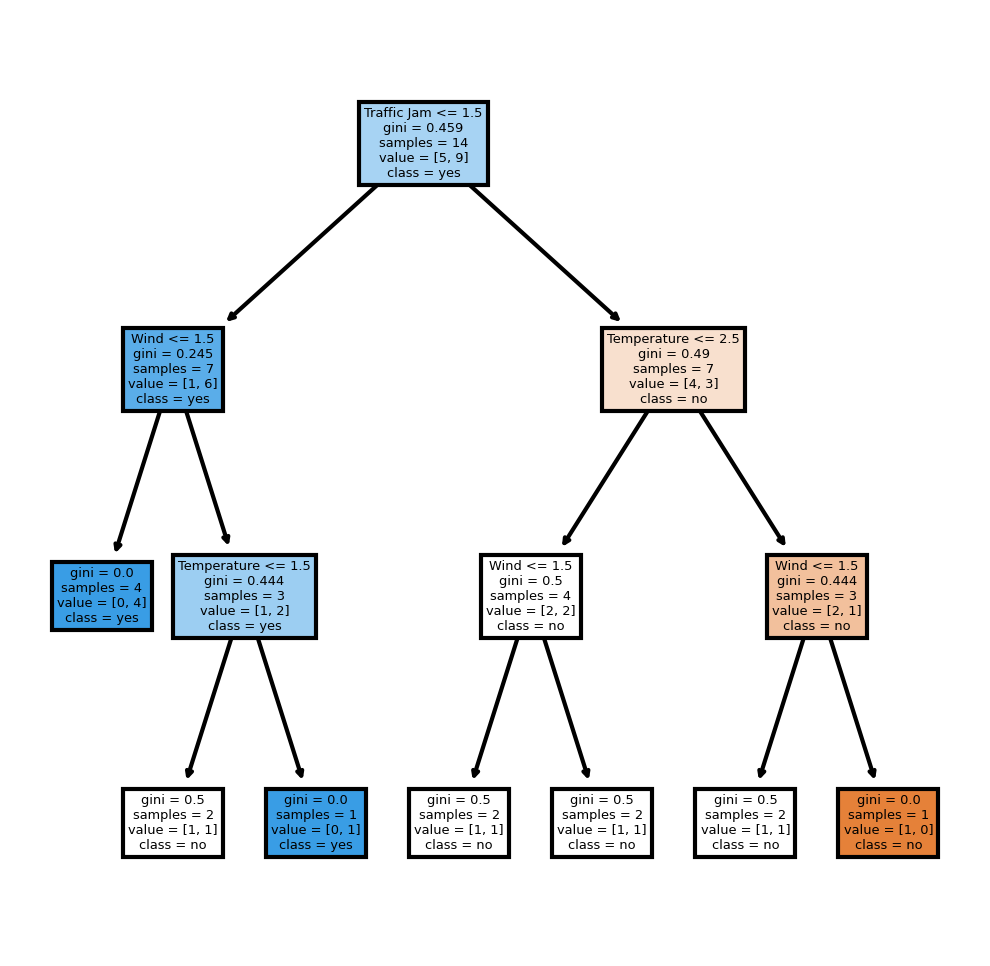

In [51]:
# visualise the decision tree

fn=['Temperature','Wind','Traffic Jam']
cn=['no', 'yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [52]:
#Fuzzify the input values

df = pd.read_csv('cardrivingdecision.csv')

df['Temperature']=df['Temperature'].replace(to_replace='hot',value=0.8)
df['Temperature']=df['Temperature'].replace(to_replace='mild',value=0.5)
df['Temperature']=df['Temperature'].replace(to_replace='cool',value=0.2)

df['Wind']=df['Wind'].replace(to_replace='weak',value=0.8)
df['Wind']=df['Wind'].replace(to_replace='strong',value=0.2)

df['Traffic Jam']=df['Traffic Jam'].replace(to_replace='long',value=0.7)
df['Traffic Jam']=df['Traffic Jam'].replace(to_replace='short',value=0.3)

df['Car Driving']=df['Car Driving'].replace(to_replace='no',value=0)
df['Car Driving']=df['Car Driving'].replace(to_replace='yes',value=1)

df.head()

,Day,Temperature,Wind,Traffic Jam,Car Driving
0,1,0.8,0.8,0.7,0
1,2,0.8,0.2,0.7,0
2,3,0.8,0.8,0.7,1
3,4,0.5,0.8,0.7,1
4,5,0.2,0.8,0.3,1


In [53]:
# split into predictor and target variable datasets

X = df[['Temperature','Wind','Traffic Jam']]
y = df[['Car Driving']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  14 non-null     float64
 1   Wind         14 non-null     float64
 2   Traffic Jam  14 non-null     float64
dtypes: float64(3)
memory usage: 464.0 bytes


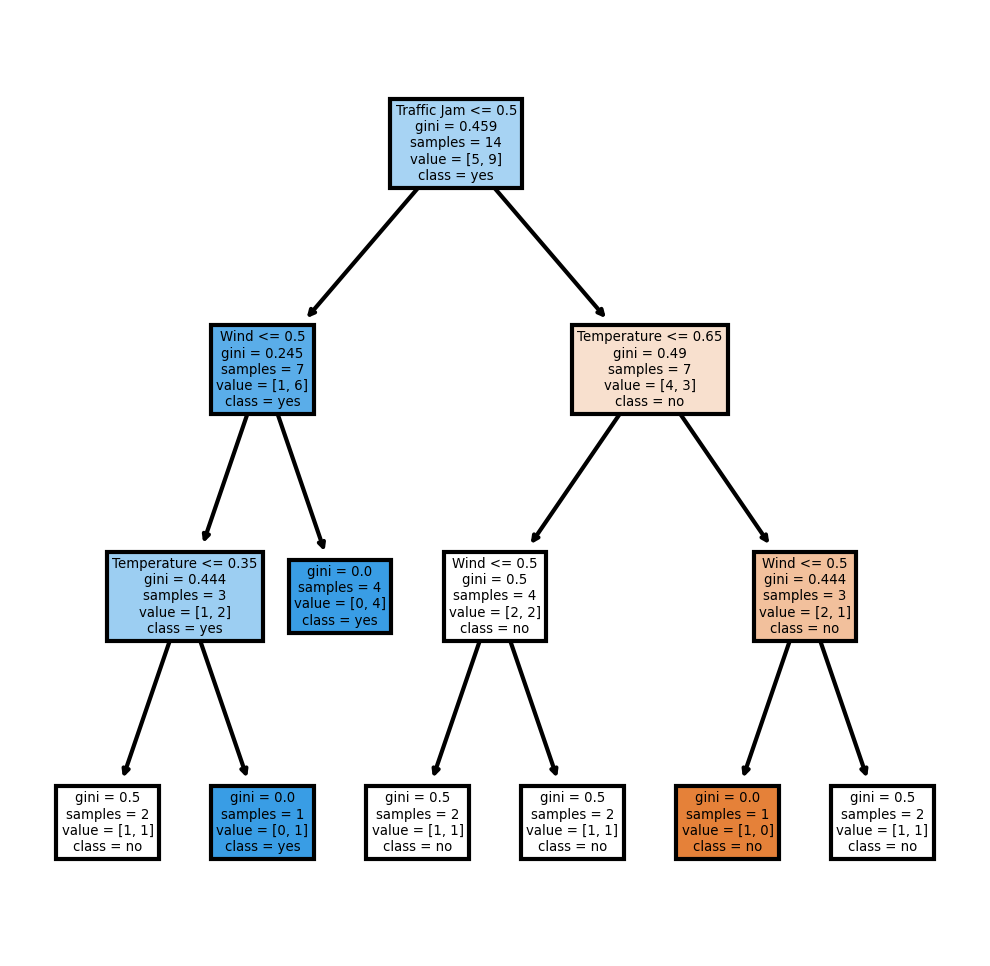

In [54]:
# Run the fuzzy decision tree classifier

clf = DecisionTreeClassifier()
clf.fit(X,y)
fn=['Temperature','Wind','Traffic Jam']
cn=['no', 'yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);